### Client-Focused Research Questions, Hypotheses, and Indicators (Jennifer Montgomery)


 Applying the EDA Workflow to Hypothesis 1

Hypothesis 1:

 Renovated Houses with Higher Grades Sell for Significantly Higher Prices than Unrenovated Ones

Statement: Renovated homes with higher grades (9 or above) tend to have a higher market value compared to their unrenovated counterparts in the same area.

Why It Matters: Jennifer is looking for resale-ready houses that are already renovated. This will test whether renovated houses truly command a premium price in the market, which is important for her investment strategy.

Indicators:

1. renovated → not renovated
2. grade
3. price

Testing Methods:

1. Grouped Bar Chart of Sale Prices: A visual comparison between renovated and unrenovated homes to observe the price difference.

2. T-test or ANOVA: Perform statistical tests to determine if there's a significant difference in mean sale prices between renovated and unrenovated homes.

3. Regression Model with Renovation as a Feature: Build a regression model where renovation status is one of the key variables to see how much renovation influences the sale price, adjusting for other factors like size, location, etc.

Import packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Fetch data from king country house table

In [2]:

# Load your dataset
df_houses = pd.read_csv('../data/king_country_house_data_index_false.csv')


In [3]:
df_houses.isnull().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64

check all empty field's total before interpolate

In [4]:
print(df_houses['yr_renovated'].isnull().sum())
print(df_houses['waterfront'].isnull().sum())
print(df_houses['view'].isnull().sum())
print(df_houses['sqft_basement'].isnull().sum())

3848
2391
63
452


### Interpolate Missing Values in Specific Columns

In [5]:
# Interpolate missing values in 'price', 'yr_renovated', 'grade', and 'waterfront'
df_houses['yr_renovated'] = df_houses['yr_renovated'].interpolate(method='linear')
df_houses['waterfront'] = df_houses['waterfront'].interpolate(method='linear')
df_houses['view'] = df_houses['view'].interpolate(method='linear')
df_houses['sqft_basement'] = df_houses['sqft_basement'].interpolate(method='linear')

In [6]:
# Display the first row where 'waterfront' is NaN
print(df_houses[df_houses['waterfront'].isnull()].head(1).to_string())

           id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15        date     price
0  7129300520       3.0        1.0       1180.0    5650.0     1.0         NaN   0.0          3      7      1180.0            0.0      1955           0.0    98178  47.5112 -122.257         1340.0      5650.0  2014-10-13  221900.0


In [7]:
# Fill any remaining NaN values in 'waterfront' with the most frequent value
df_houses['waterfront'].fillna(df_houses['waterfront'].mode()[0], inplace=True)

/tmp/ipykernel_686740/734926959.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_houses['waterfront'].fillna(df_houses['waterfront'].mode()[0], inplace=True)


In [8]:
# Display the first row where 'waterfront' is NaN
print(df_houses[df_houses['waterfront'].isnull()].head(1).to_string())

Empty DataFrame
Columns: [id, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, date, price]
Index: []


In [9]:
df_houses.isnull().sum()

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date             0
price            0
dtype: int64

check all empty field's total after interpolate

compare renovated houses vs not renovated houses

In [10]:
# Create a new column to indicate renovation status
df_houses['renovated'] = df_houses['yr_renovated'].apply(lambda x: 'Renovated' if x != 0 else 'Not Renovated')

# View sample of each group
print(df_houses['renovated'].value_counts())

# Create a new column to indicate waterfront status
df_houses['waterfront_status'] = df_houses['waterfront'].apply(lambda x: 'Waterfront' if x == 1 else 'Non-Waterfront')

renovated
Not Renovated    20527
Renovated         1070
Name: count, dtype: int64


In [11]:
# Show the first 5 rows
print(df_houses.head().to_string())

# Show the last 5 rows
print(df_houses.tail().to_string())

           id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15        date     price      renovated waterfront_status
0  7129300520       3.0       1.00       1180.0    5650.0     1.0         0.0   0.0          3      7      1180.0            0.0      1955           0.0    98178  47.5112 -122.257         1340.0      5650.0  2014-10-13  221900.0  Not Renovated    Non-Waterfront
1  6414100192       3.0       2.25       2570.0    7242.0     2.0         0.0   0.0          3      7      2170.0          400.0      1951       19910.0    98125  47.7210 -122.319         1690.0      7639.0  2014-12-09  538000.0      Renovated    Non-Waterfront
2  5631500400       2.0       1.00        770.0   10000.0     1.0         0.0   0.0          3      6       770.0            0.0      1933        9955.0    98028  47.7379 -122.233         2720.0      8062.0  2015-0

In [18]:
df_houses.to_csv("../data/king_country_house_data_index_false_filter.csv")
df_houses_filter = pd.read_csv("../data/king_country_house_data_index_false_filter.csv")
df_houses_filter

,Unnamed: 0,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,renovated,waterfront_status,grade_category
0,0,7129300520,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3,...,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0,Not Renovated,Non-Waterfront,Mid (6-8)
1,1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,...,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,Renovated,Non-Waterfront,Mid (6-8)
2,2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,...,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0,Renovated,Non-Waterfront,Low (1-5)
3,3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,...,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,Not Renovated,Non-Waterfront,Mid (6-8)
4,4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,...,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,Not Renovated,Non-Waterfront,Mid (6-8)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21592,263000018,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,...,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,360000.0,Not Renovated,Non-Waterfront,Mid (6-8)
21593,21593,6600060120,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,...,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,400000.0,Not Renovated,Non-Waterfront,Mid (6-8)
21594,21594,1523300141,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,...,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,402101.0,Not Renovated,Non-Waterfront,Mid (6-8)
21595,21595,291310100,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,3,...,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16,400000.0,Not Renovated,Non-Waterfront,Mid (6-8)


713202.870093458
531283.579042237


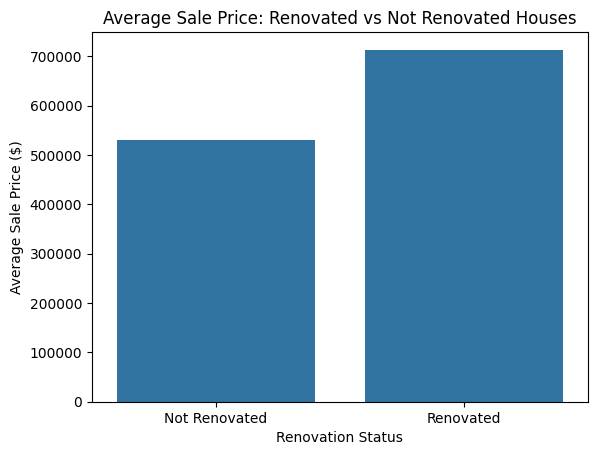

In [13]:
# Group by 'renovated' and calculate mean 'price' for each group
mean_prices = df_houses.groupby('renovated')['price'].mean().reset_index()

print(df_houses[df_houses['renovated'] == 'Renovated']['price'].mean())
print(df_houses[df_houses['renovated'] == 'Not Renovated']['price'].mean())

# Plot the barplot
sns.barplot(data=mean_prices, x='renovated', y='price')

# Add labels and title
plt.title('Average Sale Price: Renovated vs Not Renovated Houses')
plt.ylabel('Average Sale Price ($)')
plt.xlabel('Renovation Status')

# Show plot
plt.show()

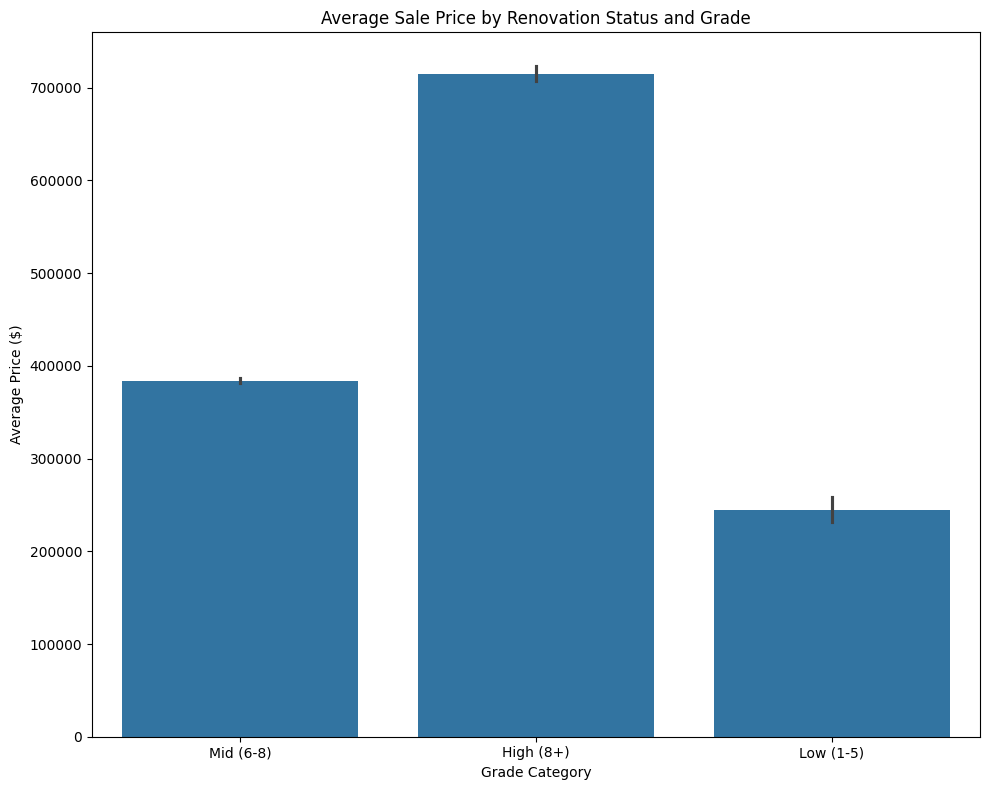

In [14]:
# Assuming df_houses is your dataframe with the relevant data

# Optionally group grades: Low (1-6), Mid (7-8), High (9+)
df_houses['grade_category'] = df_houses['grade'].apply(lambda g: 'High (8+)' if g >= 8 else 'Mid (6-8)' if g >= 6 else 'Low (1-5)')

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=df_houses, x='grade_category', y='price')
plt.title('Average Sale Price by Renovation Status and Grade')
plt.ylabel('Average Price ($)')
plt.xlabel('Grade Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

/tmp/ipykernel_686740/3498733406.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_houses.groupby(['grade_category', 'renovated'])['price'].mean().reset_index()


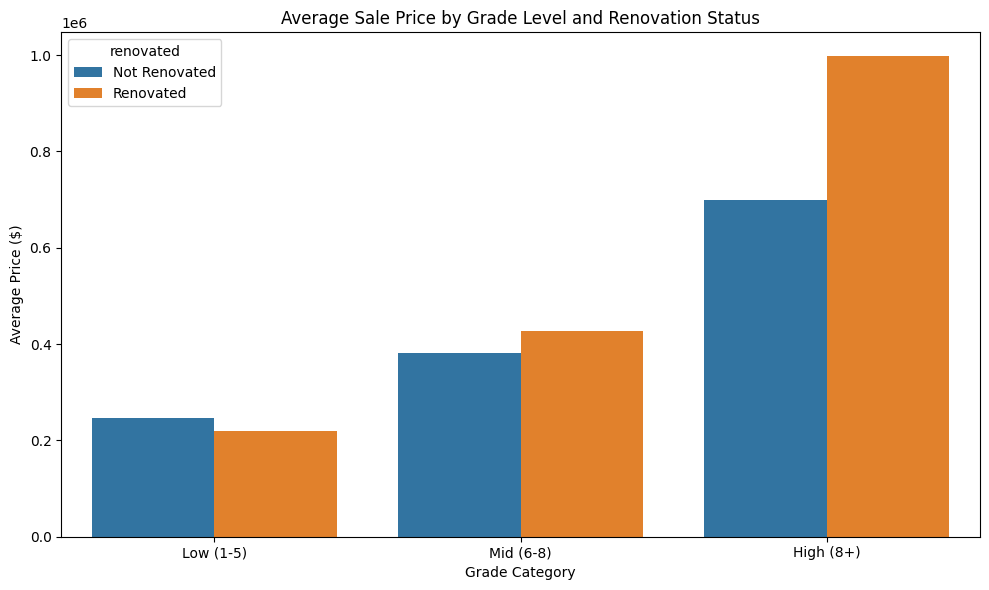

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Categorize grade
df_houses['grade_category'] = df_houses['grade'].apply(
    lambda g: 'High (8+)' if g >= 8 else 'Mid (6-8)' if g >= 6 else 'Low (1-5)'
)

# Convert to categorical type with desired order
grade_order = ['Low (1-5)', 'Mid (6-8)', 'High (8+)']
df_houses['grade_category'] = pd.Categorical(df_houses['grade_category'], categories=grade_order, ordered=True)

# Group and calculate average price
grouped = df_houses.groupby(['grade_category', 'renovated'])['price'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped,
    x='grade_category',
    y='price',
    hue='renovated',
    order=grade_order
)
plt.title('Average Sale Price by Grade Level and Renovation Status')
plt.ylabel('Average Price ($)')
plt.xlabel('Grade Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


/tmp/ipykernel_686740/4153583708.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_houses.groupby(['grade_category', 'renovated'])['price'].mean().reset_index()


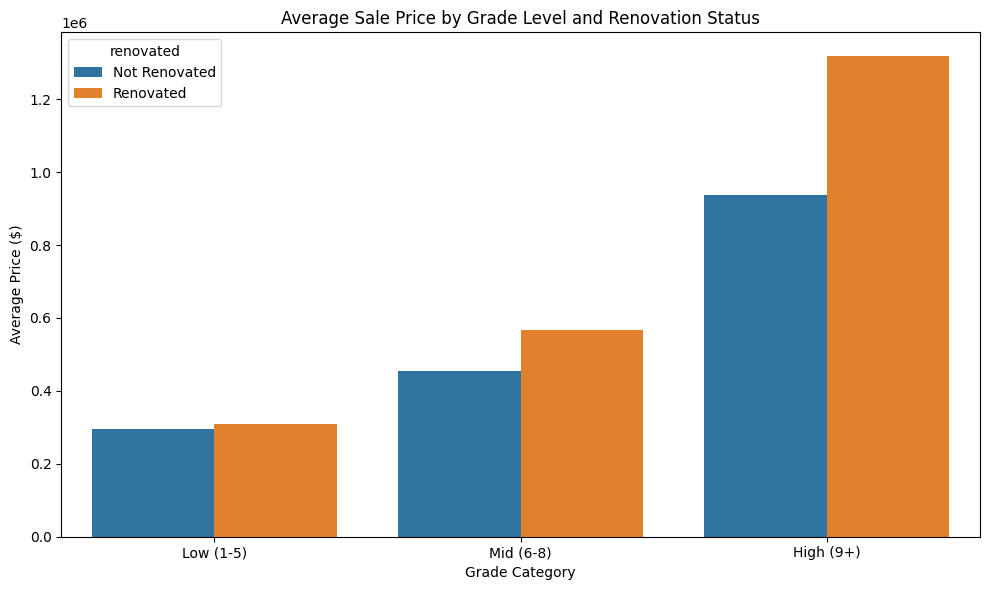

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Categorize grade
df_houses['grade_category'] = df_houses['grade'].apply(
    lambda g: 'High (9+)' if g >= 9 else 'Mid (6-8)' if g >= 7 else 'Low (1-5)'
)

# Convert to categorical type with desired order
grade_order = ['Low (1-5)', 'Mid (6-8)', 'High (9+)']
df_houses['grade_category'] = pd.Categorical(df_houses['grade_category'], categories=grade_order, ordered=True)

# Group and calculate average price
grouped = df_houses.groupby(['grade_category', 'renovated'])['price'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped,
    x='grade_category',
    y='price',
    hue='renovated',
    order=grade_order
)
plt.title('Average Sale Price by Grade Level and Renovation Status')
plt.ylabel('Average Price ($)')
plt.xlabel('Grade Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()